#  TP sound effect and artificial reverberation

In [1]:
import os, sys, wave, struct

import numpy as np
import pyaudio
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.io.wavfile as wavfile

from copy import deepcopy
from math import ceil

C:\Users\imane\AppData\Local\Temp\ipykernel_9276\846602554.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[:,np.newaxis]
    times = np.arange(data.shape[0])/rate
    plt.figure(figsize=(30,6))
    for channel in data.T:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()
    
def play_sound(data, rate):
    return ipd.Audio(data.T, rate=rate)

def nextpow2(x):
    assert x>0
    p = ceil(np.log2(x))
    x_ = 2**p
    assert 2**(p-1) < x <= x_
    return p, x_


def f2idx(F, df):
    """
    Convert frequency to corresponding index in "frequencies" array
    """
    return ceil(F/df)

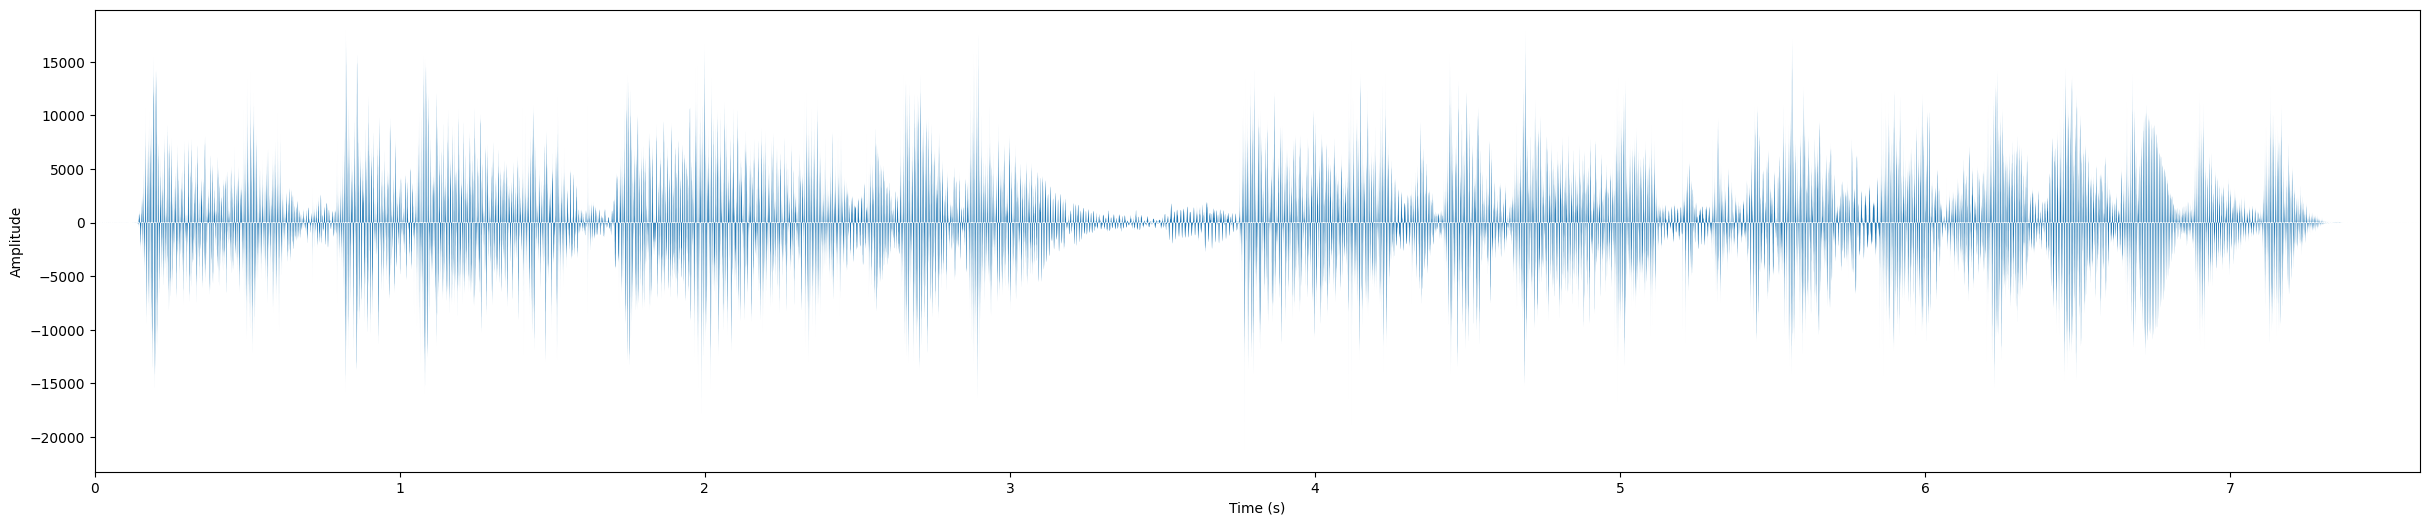

In [43]:
fname = 'guitare.wav'
rate, x = wavfile.read(fname)
# print('T = {:d}, M = {:d}'.format(*x.shape))
plot_sound(x, rate)
play_sound(x, rate)

In [7]:
timestep = 1/float(rate)
times = np.arange(len(x))*timestep

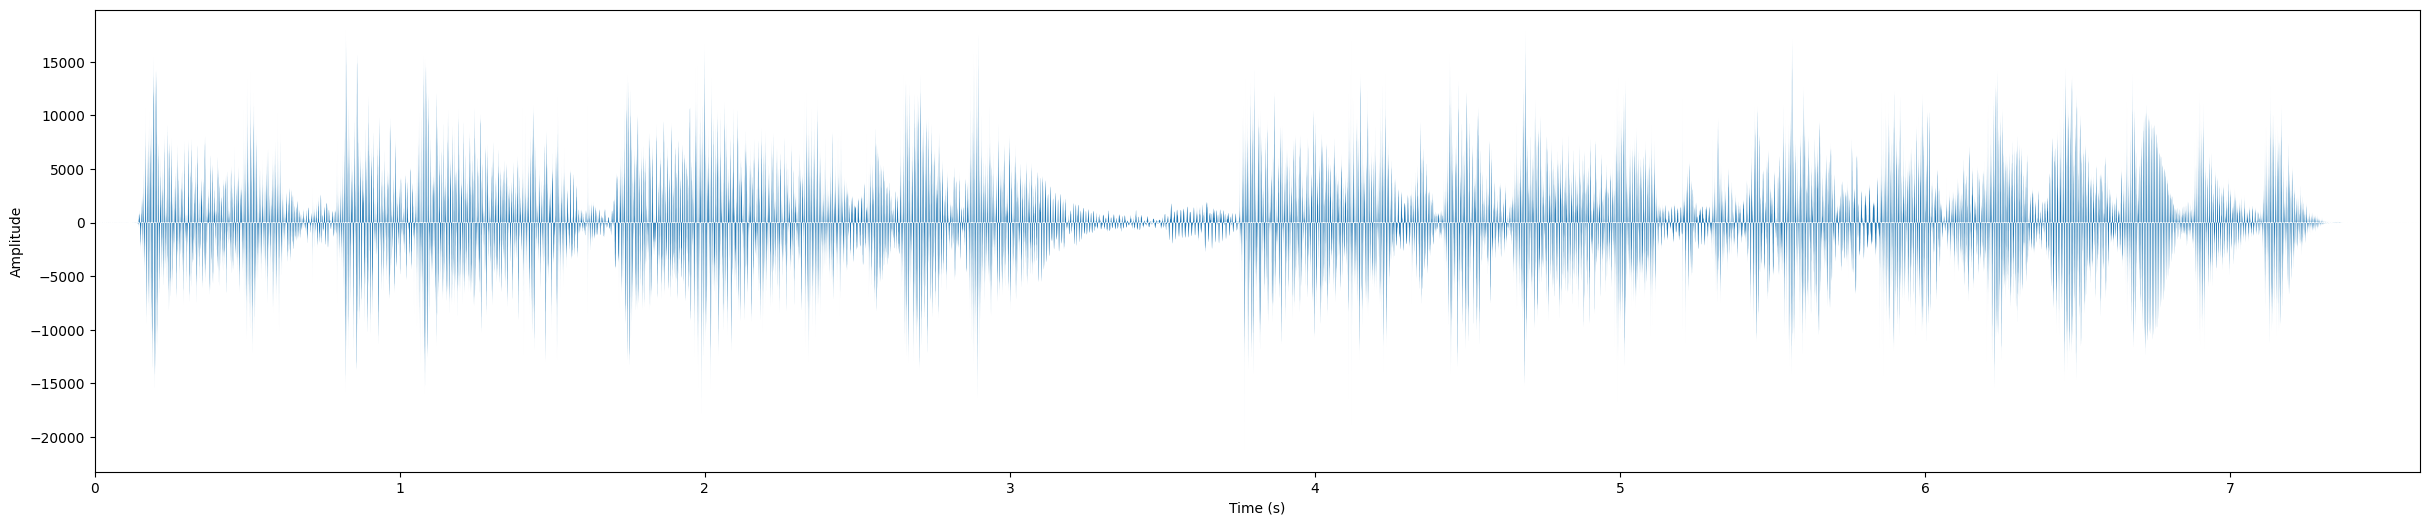

In [44]:
plot_sound(x, rate)

# 1. PHASING 
create a function that will implement the delay with periodic gain c(n)

In [45]:
def phasing(x, p, fa, a_bounds):
    #create a sin fo a 
    t= np.arange(0, len(x))
    a_min, a_max= a_bounds
    A= (a_max- a_min)/2
    B= (a_max+ a_min)/2
    a= B+ A*np.sin(2*np.pi*fa/rate*t)
    
    x_pad= np.pad(x, p, 'constant', constant_values=(0,0))[:-p]
    print(x_pad.shape)
    y=np.zeros_like(x)
    for n in range(len(x)):
        y[n]= x[n] +a[n]*x_pad[n]
    
    return y


In [46]:
fa= 10 #Hz
p= 500
a_bounds= (-2, 2)
print(x.shape)

x_phased= phasing(x,p,fa,a_bounds)

play_sound(x, rate)



(168072,)
(168572,)


In [47]:
play_sound(x_phased, rate)

In [48]:
def flanger(x, a, fp, p_bounds):
    #create a sin fo a 
    t= np.arange(0, len(x))
    a_min, a_max= p_bounds
    A= (a_max- a_min)/2
    B= (a_max+ a_min)/2
    p= B+ A*np.sin(2*np.pi*fp/rate*t)
    
    x_pad= np.pad(x, p[0], 'constant', constant_values=(0,0))[:-p[0]]
    print(x_pad.shape)
    y=np.zeros_like(x)
    for n in range(len(x)):
        y[n]= x[n] +a*x_pad[n+p[0]-p[n]]
    return y

In [51]:
fp= 50 #Hz
a= 50
p_bounds= (-2, 2)
print(x.shape)

x_flanged= phasing(x,a,fp,p_bounds)

play_sound(x, rate)

(168072,)
(168122,)


In [52]:
play_sound(x_flanged, rate)

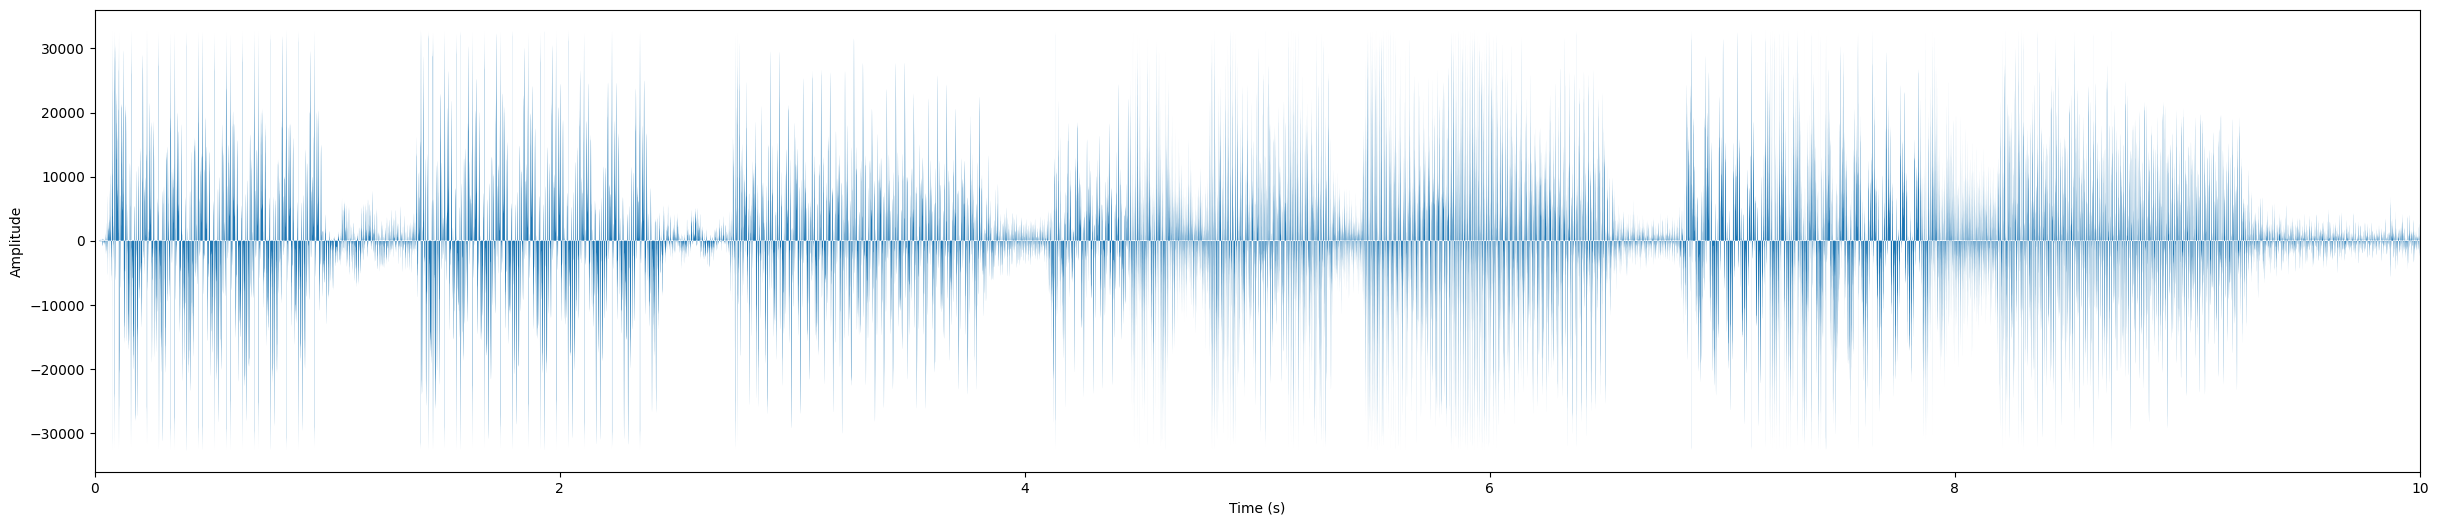

In [40]:
plot_sound(x_flanged, rate)

In [ ]:
#next compute the spectrum and see the effect of changing p in it 